# Speed of patterns study
This is a notebook to study the effects of different parameters in how long the pattern stays active for recall. In general compare the time of the sequence and recall.

In [1]:
from __future__ import print_function
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)

#### Git Machinery

In [2]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = '1e99cfe7b1982691a0212334a93d58057df83d56'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

#### Load libraries

In [4]:
from network import BCPNN, NetworkManager, BCPNNFast, Protocol
from data_transformer import build_ortogonal_patterns

from plotting_functions import plot_winning_pattern, plot_sequence
from analysis_functions import calculate_compression_factor

### Epochs range

In [4]:
# Patterns parameters
hypercolumns = 4
minicolumns = 20

# Manager properties
dt = 0.001
T_recall = 3.0
values_to_save = ['o']

epochs_range = np.arange(1, 10, 1, dtype='int')
compression_list = []
exclude_extrema = False

for epochs in epochs_range:
    # Protocol
    inter_sequence_interval = 1.0
    inter_pulse_interval = 0.0

    # Build the network
    nn = BCPNNFast(hypercolumns, minicolumns)
    nn.k_inner = False

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for
    patterns = [0, 1, 2, 3, 4, 5]
    protocol = Protocol()
    protocol.simple_protocol(patterns_indexes=patterns, training_time=training_time,
                             inter_pulse_interval=inter_pulse_interval, inter_sequence_interval=inter_sequence_interval,
                             epochs=epochs)


    # Train
    manager.run_network_protocol(protocol, verbose=False, values_to_save_epoch=None, reset=True, empty_history=True)

    manager.run_network_recall(T_recall=T_recall, T_cue=0.1, I_cue=0, reset=True, empty_history=True)

    compression = calculate_compression_factor(manager, training_time=training_time, 
                                               exclude_extrema=exclude_extrema)
    compression_list.append(compression)

compression_list = np.array(compression_list)
means = np.mean(compression_list, axis=1)
std = np.std(compression_list, axis=1)

../analysis_functions.py:43: RuntimeWarning: invalid value encountered in double_scalars
  dis = [a / b for (a, b) in zip(nominator, denominator)]


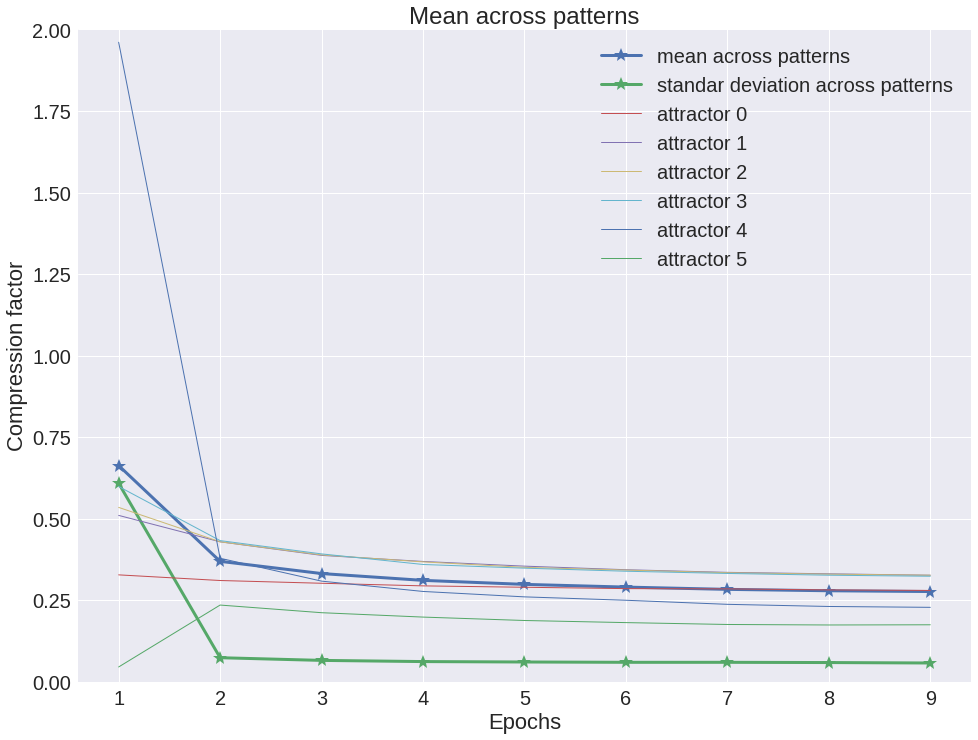

In [5]:
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(epochs_range, means, '*-', markersize=14, linewidth=3.0, label='mean across patterns')
ax.plot(epochs_range, std, '*-', markersize=14, linewidth=3.0, label='standar deviation across patterns')
for index, x in enumerate(compression_list.T):
    ax.plot(epochs_range, x, '-', linewidth=1.0, label='attractor ' + str(index))


ax.set_xlabel('Epochs')
ax.set_ylabel('Compression factor')
ax.set_title('Mean across patterns')

ax.legend()
ax.set_ylim(0, 2.0);

#### Training time

In [7]:
# Patterns parameters
hypercolumns = 4
minicolumns = 20

# Manager properties
dt = 0.001
T_recall = 3.0
values_to_save = ['o']

training_times = np.arange(0.025, 0.550, 0.025)
compression_list = []
exclude_extrema = True

for training_time in training_times:
    # Protocol
    inter_sequence_interval = 1.0
    inter_pulse_interval = 0.0
    epochs = 3

    # Build the network
    nn = BCPNNFast(hypercolumns, minicolumns)
    nn.k_inner = False

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for
    patterns = [0, 1, 2, 3, 4, 5]
    protocol = Protocol()
    protocol.simple_protocol(patterns_indexes=patterns, training_time=training_time,
                             inter_pulse_interval=inter_pulse_interval, inter_sequence_interval=inter_sequence_interval,
                             epochs=epochs)

    # Train
    manager.run_network_protocol(protocol, verbose=False, values_to_save_epoch=None, reset=True, empty_history=True)

    manager.run_network_recall(T_recall=T_recall, T_cue=0.1, I_cue=0, reset=True, empty_history=True)

    compression = calculate_compression_factor(manager, training_time=training_time, 
                                               exclude_extrema=exclude_extrema)
    compression_list.append(compression)

compression_list = np.array(compression_list)
means = np.mean(compression_list, axis=1)
std = np.std(compression_list, axis=1)

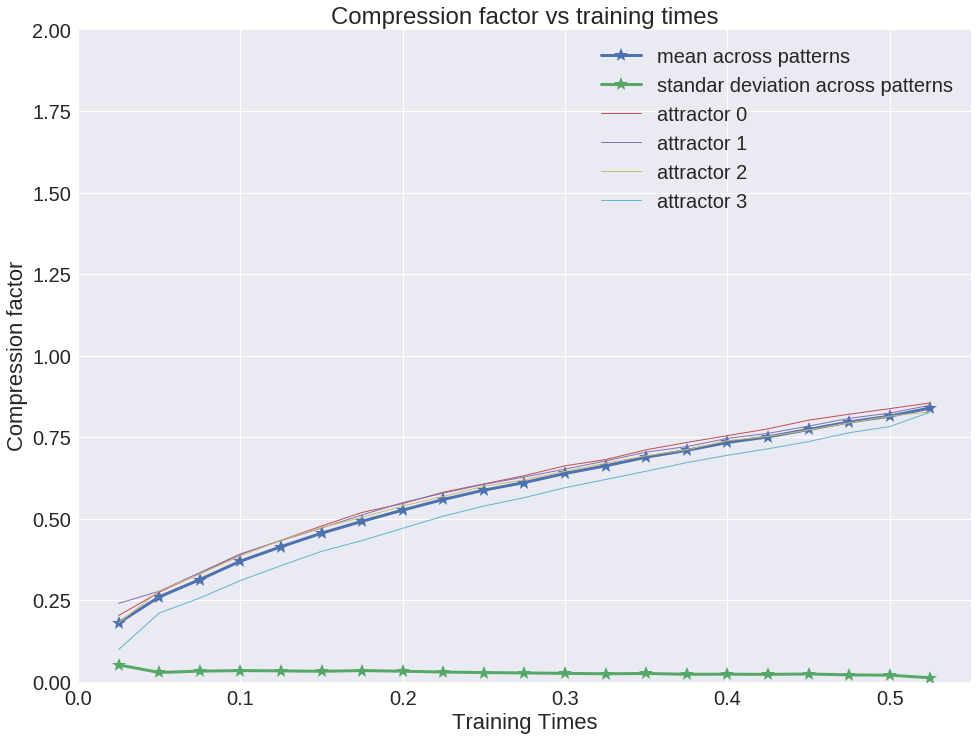

In [8]:
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(training_times, means, '*-', markersize=14,linewidth=3.0, label='mean across patterns')
ax.plot(training_times, std, '*-', markersize=14, linewidth=3.0, label='standar deviation across patterns')

for index, x in enumerate(compression_list.T):
    ax.plot(training_times, x, '-', linewidth=1.0, label='attractor ' + str(index))

ax.set_xlabel('Training Times')
ax.set_ylabel('Compression factor')
ax.set_title('Compression factor vs training times')


ax.legend()
ax.set_ylim(0, 2.0);

Above trainig times of **0.5 secondsthe network does not recall the sequence correctly** so I do not show this range.

#### Minicolumns

In [8]:
# Patterns parameters
hypercolumns = 4
minicolumns = 20

# Manager properties
dt = 0.001
T_recall = 3.0
values_to_save = ['o']

minicolumns_range = np.arange(10, 55, 5)
compression_list = []
exclude_extrema = False

for minicolumns in minicolumns_range:
    # Protocol
    training_time = 0.1
    inter_sequence_interval = 1.0
    inter_pulse_interval = 0.0
    epochs = 3

    # Build the network
    nn = BCPNNFast(hypercolumns, minicolumns)
    nn.k_inner = False

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for
    patterns = [0, 1, 2, 3, 4, 5]
    protocol = Protocol()
    protocol.simple_protocol(patterns_indexes=patterns, training_time=training_time,
                             inter_pulse_interval=inter_pulse_interval, inter_sequence_interval=inter_sequence_interval,
                             epochs=epochs)


    # Train
    manager.run_network_protocol(protocol, verbose=False, values_to_save_epoch=None, reset=True, empty_history=True)

    manager.run_network_recall(T_recall=T_recall, T_cue=0.1, I_cue=0, reset=True, empty_history=True)

    compression = calculate_compression_factor(manager, training_time=training_time, 
                                               exclude_extrema=exclude_extrema)
    compression_list.append(compression)

compression_list = np.array(compression_list)
means = np.mean(compression_list, axis=1)
std = np.std(compression_list, axis=1)

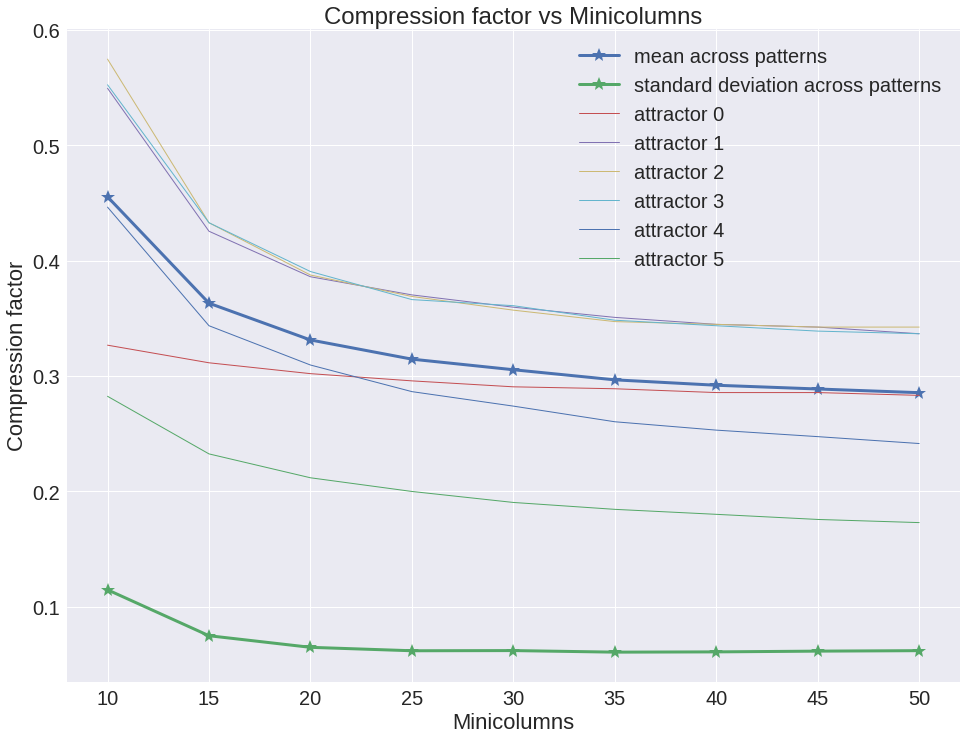

In [9]:
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(minicolumns_range, means, '*-', markersize=14, linewidth=3.0, label='mean across patterns')
ax.plot(minicolumns_range, std, '*-', markersize=14, linewidth=3.0, label='standard deviation across patterns')

for index, x in enumerate(compression_list.T):
    ax.plot(minicolumns_range, x, '-', linewidth=1.0, label='attractor ' + str(index))

ax.set_xlabel('Minicolumns')
ax.set_ylabel('Compression factor')
ax.set_title('Compression factor vs Minicolumns')


ax.legend()
# ax.set_ylim(0, 2.0);

#### Hypercolumns

In [10]:
# Patterns parameters
hypercolumns = 4
minicolumns = 20
exclude_extrema = False

# Manager properties
dt = 0.001
T_recall = 3.0
values_to_save = ['o']

hypercolumns_range = np.arange(4, 24, 4)
compression_list = []

for hypercolums in hypercolumns_range:
    # Protocol
    training_time = 0.1
    inter_sequence_interval = 1.0
    inter_pulse_interval = 0.0
    epochs = 3

    # Build the network
    nn = BCPNNFast(hypercolumns, minicolumns)
    nn.k_inner = False

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for
    patterns = [0, 1, 2, 3, 4, 5]
    protocol = Protocol()
    protocol.simple_protocol(patterns_indexes=patterns, training_time=training_time,
                             inter_pulse_interval=inter_pulse_interval, inter_sequence_interval=inter_sequence_interval,
                             epochs=epochs)


    # Train
    manager.run_network_protocol(protocol, verbose=False, values_to_save_epoch=None, reset=True, empty_history=True)

    manager.run_network_recall(T_recall=T_recall, T_cue=0.1, I_cue=0, reset=True, empty_history=True)

    compression = calculate_compression_factor(manager, training_time=training_time, 
                                               exclude_extrema=exclude_extrema)
    compression_list.append(compression)

compression_list = np.array(compression_list)
means = np.mean(compression_list, axis=1)
std = np.std(compression_list, axis=1)

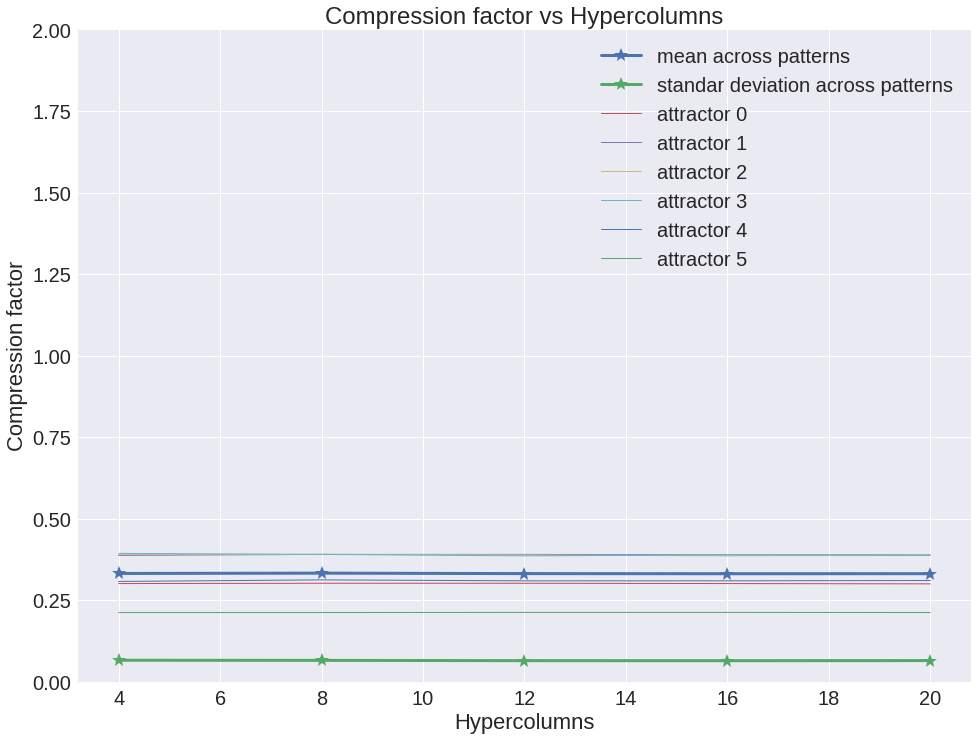

In [12]:
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(hypercolumns_range, means, '*-', markersize=14, linewidth=3.0, label='mean across patterns')
ax.plot(hypercolumns_range, std, '*-', markersize=14, linewidth=3.0, label='standar deviation across patterns')

for index, x in enumerate(compression_list.T):
    ax.plot(hypercolumns_range, x, '-', linewidth=1.0, label='attractor ' + str(index))

ax.set_xlabel('Hypercolumns')
ax.set_ylabel('Compression factor')
ax.set_title('Compression factor vs Hypercolumns')


ax.legend()
ax.set_ylim(0, 2.0);

#### Number of patterns

In [13]:
# Patterns parameters
hypercolumns = 4
minicolumns = 40
exclude_extrema = False

# Manager properties
dt = 0.001
T_recall = 8.0
values_to_save = ['o']

number_of_patterns_range = np.arange(3, 20, 2)
compression_list = []

for number_of_patterns in number_of_patterns_range:
    # Protocol
    training_time = 0.1
    inter_sequence_interval = 1.0
    inter_pulse_interval = 0.0
    epochs = 3

    # Build the network
    nn = BCPNNFast(hypercolumns, minicolumns)
    nn.k_inner = False

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for
    patterns = [x for x in range(number_of_patterns)]
    protocol = Protocol()
    protocol.simple_protocol(patterns_indexes=patterns, training_time=training_time,
                             inter_pulse_interval=inter_pulse_interval, inter_sequence_interval=inter_sequence_interval,
                             epochs=epochs)


    # Train
    manager.run_network_protocol(protocol, verbose=False, values_to_save_epoch=None, reset=True, empty_history=True)

    manager.run_network_recall(T_recall=T_recall, T_cue=0.1, I_cue=0, reset=True, empty_history=True)

    compression = calculate_compression_factor(manager, training_time=training_time, 
                                               exclude_extrema=exclude_extrema)
    compression_list.append(compression)



3
5
7
9
11
13
15
17
19


In [14]:
compression_list = np.array(compression_list)
means = [np.mean(compression) for compression in compression_list]
std = [np.std(compression) for compression in compression_list]

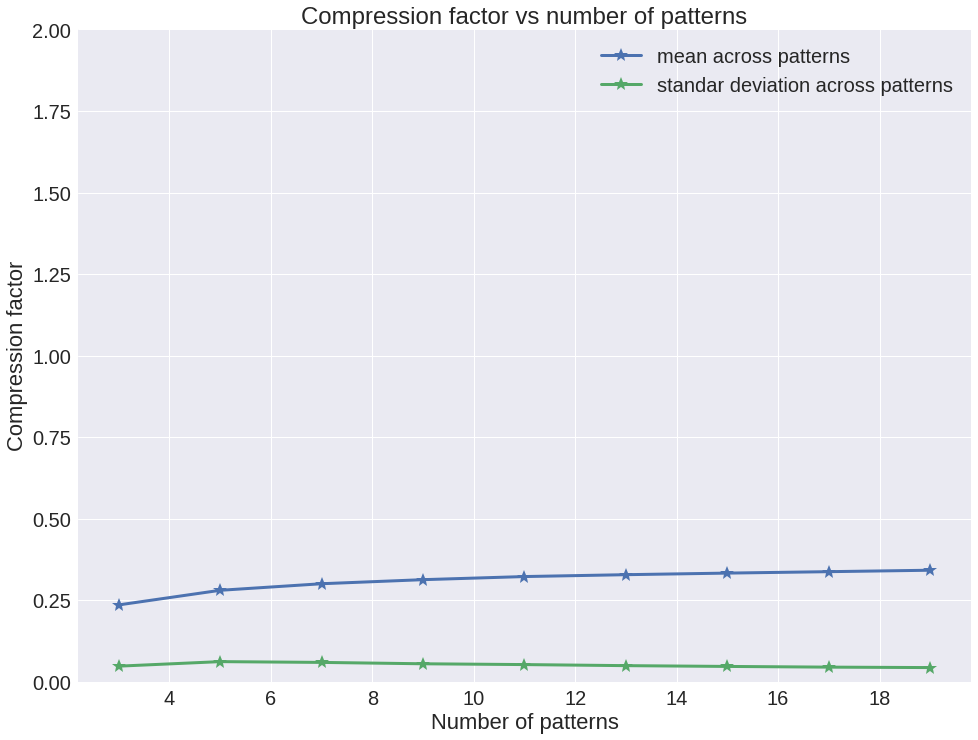

In [15]:
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(number_of_patterns_range, means, '*-', markersize=14, linewidth=3.0, label='mean across patterns')
ax.plot(number_of_patterns_range, std, '*-', markersize=14, linewidth=3.0, label='standar deviation across patterns')


ax.set_xlabel('Number of patterns')
ax.set_ylabel('Compression factor')
ax.set_title('Compression factor vs number of patterns')


ax.legend()
ax.set_ylim(0, 2.0);

#### Time constants

In [16]:
# Patterns parameters
hypercolumns = 4
minicolumns = 20
exclude_extrema = False
number_of_patterns = 5

# Manager properties
dt = 0.001
T_recall = 3.0
values_to_save = ['o']

tau_z_pre_range = np.arange(0.050, 0.450, 0.050)
compression_list = []

for tau_z_pre in tau_z_pre_range:
    # Protocol
    training_time = 0.1
    inter_sequence_interval = 1.0
    inter_pulse_interval = 0.0
    epochs = 3

    # Build the network
    nn = BCPNNFast(hypercolumns, minicolumns, tau_z_pre=tau_z_pre)
    nn.k_inner = False

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for
    patterns = [x for x in range(number_of_patterns)]
    protocol = Protocol()
    protocol.simple_protocol(patterns_indexes=patterns, training_time=training_time,
                             inter_pulse_interval=inter_pulse_interval, inter_sequence_interval=inter_sequence_interval,
                             epochs=epochs)


    # Train
    manager.run_network_protocol(protocol, verbose=False, values_to_save_epoch=None, reset=True, empty_history=True)

    manager.run_network_recall(T_recall=T_recall, T_cue=0.1, I_cue=0, reset=True, empty_history=True)

    compression = calculate_compression_factor(manager, training_time=training_time, 
                                               exclude_extrema=exclude_extrema)
    compression_list.append(compression)

compression_list = np.array(compression_list)
means = np.mean(compression_list, axis=1)
std = np.std(compression_list, axis=1)

0.15
0.05
0.1
0.15
0.2
0.25
0.3
0.35


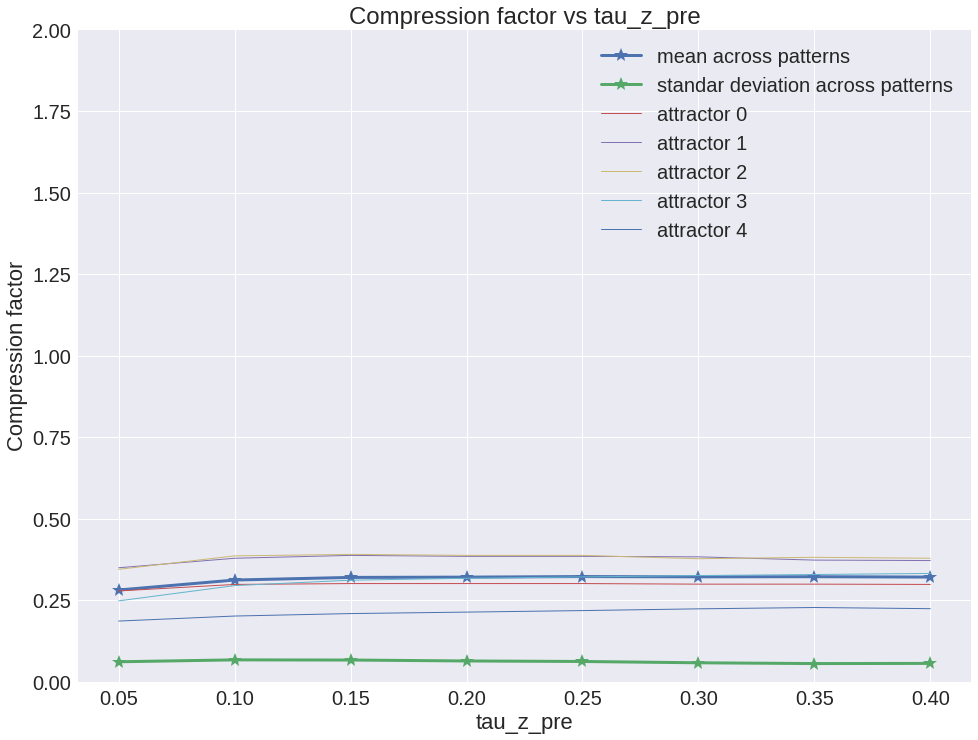

In [17]:
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(tau_z_pre_range, means, '*-', markersize=14, linewidth=3.0, label='mean across patterns')
ax.plot(tau_z_pre_range, std, '*-', markersize=14, linewidth=3.0, label='standar deviation across patterns')

for index, x in enumerate(compression_list.T):
    ax.plot(tau_z_pre_range, x, '-', linewidth=1.0, label='attractor ' + str(index))

ax.set_xlabel('tau_z_pre')
ax.set_ylabel('Compression factor')
ax.set_title('Compression factor vs tau_z_pre')


ax.legend()
ax.set_ylim(0, 2.0);

#### Adaptation time constant

In [18]:
# Patterns parameters
hypercolumns = 4
minicolumns = 20
exclude_extrema = False
number_of_patterns = 5

# Manager properties
dt = 0.001
T_recall = 3.0
values_to_save = ['o']

tau_a_range = np.arange(0.500, 5.500, 0.500)
compression_list = []


for tau_a in tau_a_range:
    # Protocol
    training_time = 0.1
    inter_sequence_interval = 1.0
    inter_pulse_interval = 0.0
    epochs = 3

    # Build the network
    nn = BCPNNFast(hypercolumns, minicolumns, tau_a=tau_a)
    nn.k_inner = False

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for
    patterns = [x for x in range(number_of_patterns)]
    protocol = Protocol()
    protocol.simple_protocol(patterns_indexes=patterns, training_time=training_time,
                             inter_pulse_interval=inter_pulse_interval, inter_sequence_interval=inter_sequence_interval,
                             epochs=epochs)


    # Train
    manager.run_network_protocol(protocol, verbose=False, values_to_save_epoch=None, reset=True, empty_history=True)

    manager.run_network_recall(T_recall=T_recall, T_cue=0.1, I_cue=0, reset=True, empty_history=True)

    compression = calculate_compression_factor(manager, training_time=training_time, 
                                               exclude_extrema=exclude_extrema)
    compression_list.append(compression)

compression_list = np.array(compression_list)
means = np.mean(compression_list, axis=1)
std = np.std(compression_list, axis=1)

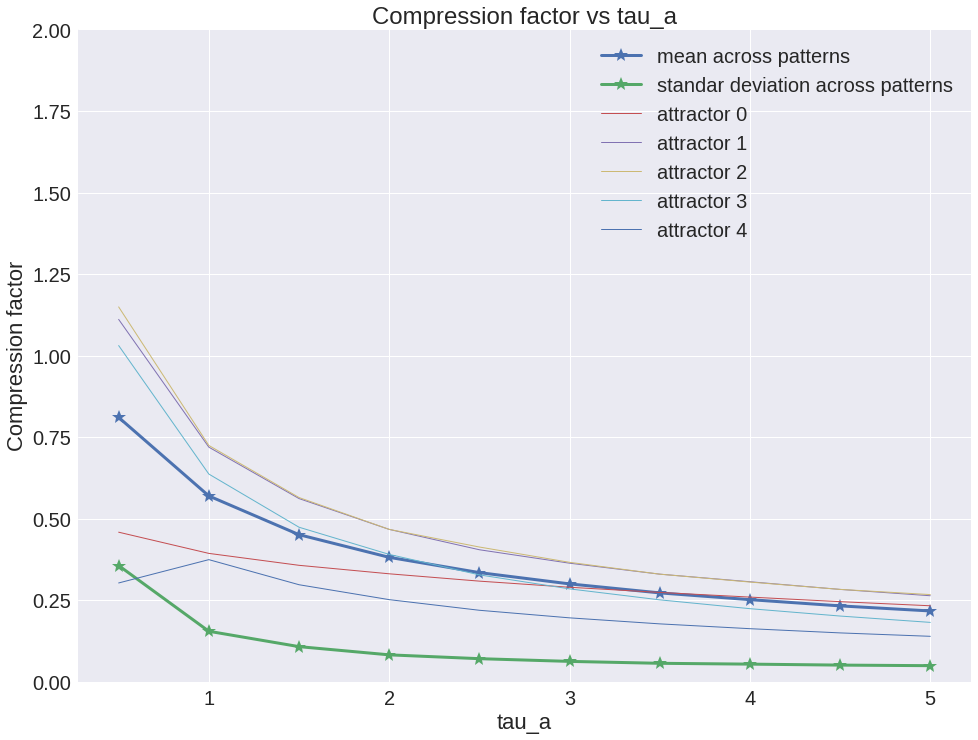

In [19]:
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(tau_a_range, means, '*-', markersize=14, linewidth=3.0, label='mean across patterns')
ax.plot(tau_a_range, std, '*-', markersize=14, linewidth=3.0, label='standar deviation across patterns')

for index, x in enumerate(compression_list.T):
    ax.plot(tau_a_range, x, '-', linewidth=1.0, label='attractor ' + str(index))

ax.set_xlabel('tau_a')
ax.set_ylabel('Compression factor')
ax.set_title('Compression factor vs tau_a')


ax.legend()
ax.set_ylim(0, 2.0);

#### Adaptation strength

In [20]:
# Patterns parameters
hypercolumns = 4
minicolumns = 20
exclude_extrema = False
number_of_patterns = 5

# Manager properties
dt = 0.001
T_recall = 3.0
values_to_save = ['o']

g_a_range = np.arange(70, 160, 10)
compression_list = []


for g_a in g_a_range:
    # Protocol
    training_time = 0.1
    inter_sequence_interval = 1.0
    inter_pulse_interval = 0.0
    epochs = 3

    # Build the network
    nn = BCPNNFast(hypercolumns, minicolumns, g_a=g_a)
    nn.k_inner = False

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for
    patterns = [x for x in range(number_of_patterns)]
    protocol = Protocol()
    protocol.simple_protocol(patterns_indexes=patterns, training_time=training_time,
                             inter_pulse_interval=inter_pulse_interval, inter_sequence_interval=inter_sequence_interval,
                             epochs=epochs)


    # Train
    manager.run_network_protocol(protocol, verbose=False, values_to_save_epoch=None, reset=True, empty_history=True)

    manager.run_network_recall(T_recall=T_recall, T_cue=0.1, I_cue=0, reset=True, empty_history=True)

    compression = calculate_compression_factor(manager, training_time=training_time, 
                                               exclude_extrema=exclude_extrema)
    compression_list.append(compression)

compression_list = np.array(compression_list)
means = np.mean(compression_list, axis=1)
std = np.std(compression_list, axis=1)

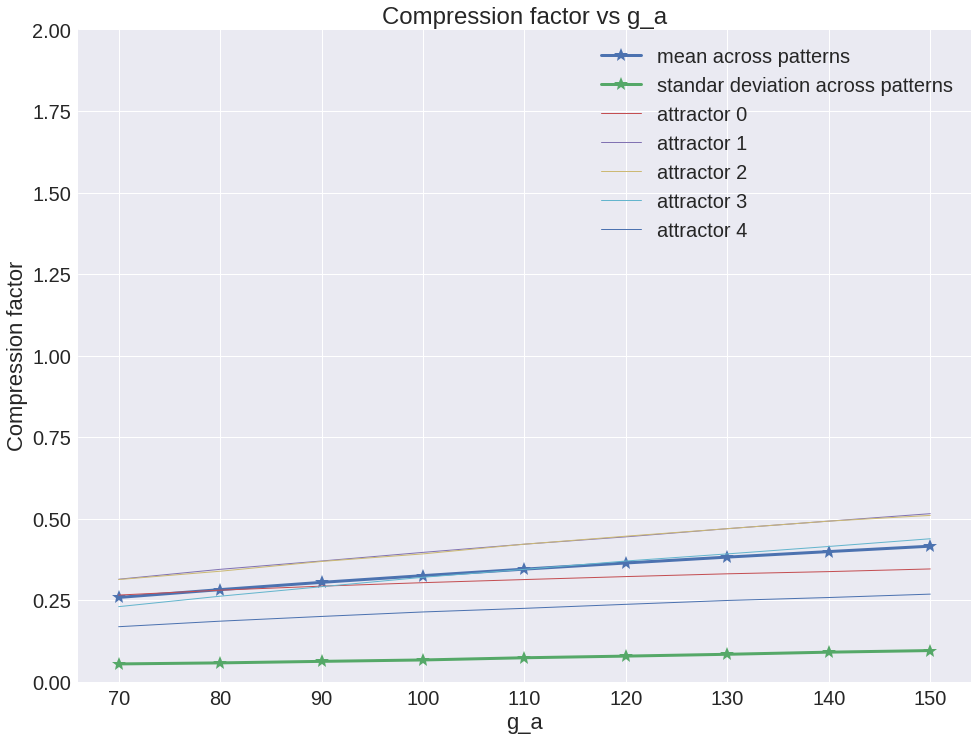

In [21]:
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(g_a_range, means, '*-', markersize=14, linewidth=3.0, label='mean across patterns')
ax.plot(g_a_range, std, '*-', markersize=14, linewidth=3.0, label='standar deviation across patterns')

for index, x in enumerate(compression_list.T):
    ax.plot(g_a_range, x, '-', linewidth=1.0, label='attractor ' + str(index))

ax.set_xlabel('g_a')
ax.set_ylabel('Compression factor')
ax.set_title('Compression factor vs g_a')


ax.legend()
ax.set_ylim(0, 2.0);

#### g_w strength

In [22]:
# Patterns parameters
hypercolumns = 4
minicolumns = 20
exclude_extrema = False
number_of_patterns = 5

# Manager properties
dt = 0.001
T_recall = 3.0
values_to_save = ['o']

g_w_range = np.arange(0.5, 1.6, 0.1)
compression_list = []


for g_w in g_w_range:
    # Protocol
    training_time = 0.1
    inter_sequence_interval = 1.0
    inter_pulse_interval = 0.0
    epochs = 3

    # Build the network
    nn = BCPNNFast(hypercolumns, minicolumns, g_w=g_w)
    nn.k_inner = False

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for
    patterns = [x for x in range(number_of_patterns)]
    protocol = Protocol()
    protocol.simple_protocol(patterns_indexes=patterns, training_time=training_time,
                             inter_pulse_interval=inter_pulse_interval, inter_sequence_interval=inter_sequence_interval,
                             epochs=epochs)


    # Train
    manager.run_network_protocol(protocol, verbose=False, values_to_save_epoch=None, reset=True, empty_history=True)

    manager.run_network_recall(T_recall=T_recall, T_cue=0.1, I_cue=0, reset=True, empty_history=True)

    compression = calculate_compression_factor(manager, training_time=training_time, 
                                               exclude_extrema=exclude_extrema)
    compression_list.append(compression)

compression_list = np.array(compression_list)
means = np.mean(compression_list, axis=1)
std = np.std(compression_list, axis=1)

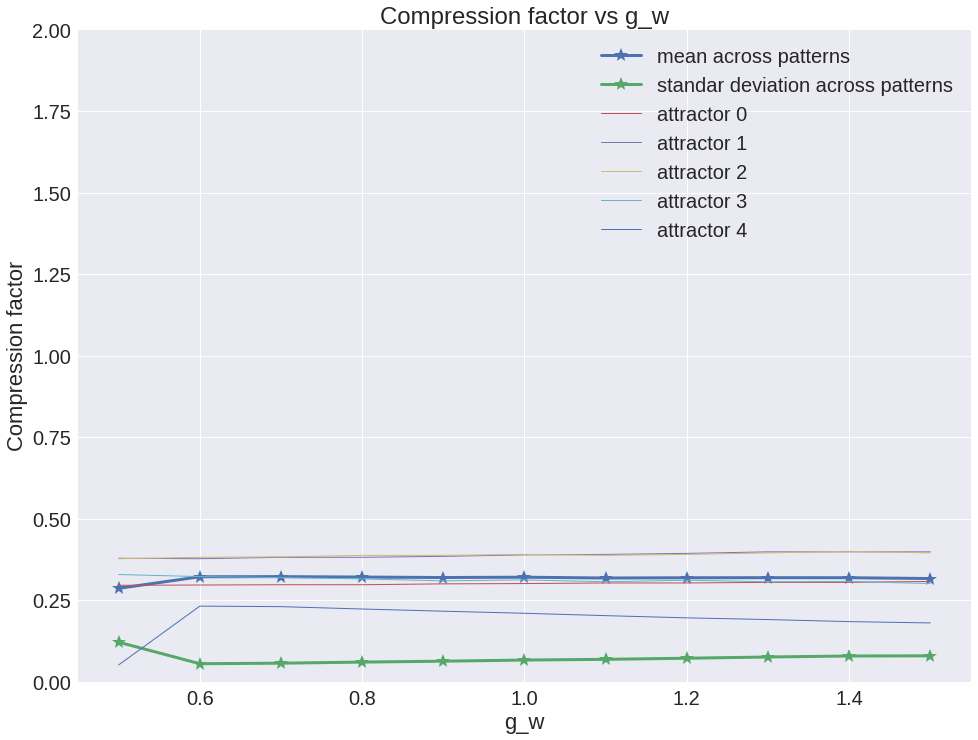

In [23]:
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(g_w_range, means, '*-', markersize=14, linewidth=3.0, label='mean across patterns')
ax.plot(g_w_range, std, '*-', markersize=14, linewidth=3.0, label='standar deviation across patterns')

for index, x in enumerate(compression_list.T):
    ax.plot(g_w_range, x, '-', linewidth=1.0, label='attractor ' + str(index))

ax.set_xlabel('g_w')
ax.set_ylabel('Compression factor')
ax.set_title('Compression factor vs g_w')


ax.legend()
ax.set_ylim(0, 2.0);

#### g_ampa strength

In [5]:
# Patterns parameters
hypercolumns = 4
minicolumns = 20
exclude_extrema = False
number_of_patterns = 5

# Manager properties
dt = 0.001
T_recall = 3.0
values_to_save = ['o']

g_w_range = np.arange(0.5, 1.6, 0.1)
compression_list = []


for g_w in g_w_range:
    # Protocol
    training_time = 0.1
    inter_sequence_interval = 1.0
    inter_pulse_interval = 0.0
    epochs = 3

    # Build the network
    nn = BCPNNFast(hypercolumns, minicolumns, g_w_ampa=g_w)
    nn.k_inner = False

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for
    patterns = [x for x in range(number_of_patterns)]
    protocol = Protocol()
    protocol.simple_protocol(patterns_indexes=patterns, training_time=training_time,
                             inter_pulse_interval=inter_pulse_interval, inter_sequence_interval=inter_sequence_interval,
                             epochs=epochs)


    # Train
    manager.run_network_protocol(protocol, verbose=False, values_to_save_epoch=None, reset=True, empty_history=True)

    manager.run_network_recall(T_recall=T_recall, T_cue=0.1, I_cue=0, reset=True, empty_history=True)

    compression = calculate_compression_factor(manager, training_time=training_time, 
                                               exclude_extrema=exclude_extrema)
    compression_list.append(compression)

compression_list = np.array(compression_list)
means = np.mean(compression_list, axis=1)
std = np.std(compression_list, axis=1)

../analysis_functions.py:43: RuntimeWarning: invalid value encountered in double_scalars
  dis = [a / b for (a, b) in zip(nominator, denominator)]


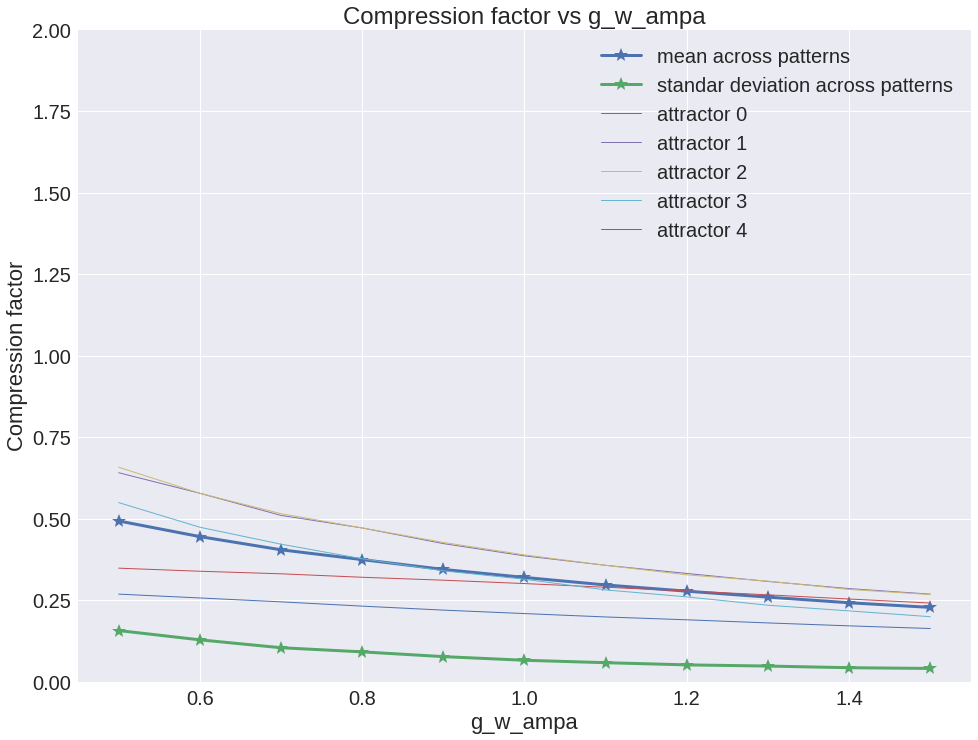

In [6]:
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(g_w_range, means, '*-', markersize=14, linewidth=3.0, label='mean across patterns')
ax.plot(g_w_range, std, '*-', markersize=14, linewidth=3.0, label='standar deviation across patterns')

for index, x in enumerate(compression_list.T):
    ax.plot(g_w_range, x, '-', linewidth=1.0, label='attractor ' + str(index))

ax.set_xlabel('g_w_ampa')
ax.set_ylabel('Compression factor')
ax.set_title('Compression factor vs g_w_ampa')


ax.legend()
ax.set_ylim(0, 2.0);

What we see here is in opposition to g_w_nmda g_w_ampa does have an effect on the compression factor. We have longer compression factors the lower is g_w_ampa, which means that as hte effects of g_a_ampa becomes bigger the recalled sequences last even longer compared to the original ones. This makes sense, the ampa connections stabilize pattern so if this is bigger the pattern will become more stabilize and therefore last longer.

#### Git machinery

In [ ]:
if run_old_version:
    subprocess.call(['git', 'checkout', 'master'])